# Tale of Two Markets: Detecting Structural Changes in Trading Patterns Around TARP

![](http://canarytokens.com/feedback/t4s7b5qg5wsrifq4bcndz2oxe/index.html)

### Competition Overview:

This competition challenges participants to detect fundamental changes in market microstructure during one of the most significant policy interventions in financial history. Using 10-minute return data from major financial instruments, your task is to develop models that can identify whether a given trading day occurred before or after the implementation of TARP (Troubled Asset Relief Program) on October 3, 2008. We will focus on the period of generally declining stock prices from October 2007 to March 2009.

### Background:
The 2008 Global Financial Crisis (GFC) emerged from the collapse of the U.S. housing market and the subsequent unraveling of mortgage-backed securities (MBS) and collateralized debt obligations (CDOs). As home prices declined and foreclosures increased, these complex financial instruments, which were widely held by banks and financial institutions, began losing value rapidly.

The Crisis Mechanism:
* Housing Collapse: Falling home prices triggered widespread defaults
* Securities Impact: MBS and CDO values plummeted
* Bank Crisis: Financial institutions face massive losses
* Credit Freeze: Banks stop lending to each other
* Economic Impact: Credit crisis spreads to real economy

Key Events Leading to Crisis:
* 2007: Housing market peaks, subprime lenders begin failing
* March 2008: Bear Stearns collapses, sold to JPMorgan
* September 2008:
  * Fannie Mae and Freddie Mac placed into conservatorship
  * Lehman Brothers files for bankruptcy (largest in U.S. history)
  * Merrill Lynch sold to Bank of America
  * AIG receives $85 billion emergency loan
  * Money market fund "breaks the buck"
  * Credit markets freeze globally

TARP (Government Response to Crisis):

The Troubled Asset Relief Program (TARP), officially launched on October 3, 2008, represented an unprecedented intervention in free markets. The government concluded that the financial system was caught in a destructive feedback loop: forced asset sales were driving down prices, leading to margin calls and capital inadequacy, which forced more sales. They believed this self-reinforcing cycle would collapse the entire financial system if left unchecked.

Financial Institution Bailouts and Market Impact:

Direct TARP Recipients and Support
- **Citigroup (C)**: \$45 billion TARP + \$301 billion asset guarantee
- **Bank of America (BAC)**: \$45 billion TARP + \$118 billion asset guarantee
- **JPMorgan Chase (JPM)**: \$25 billion TARP
- **Wells Fargo (WFC)**: \$25 billion TARP
- **AIG**: \$182 billion total rescue package (Fed + Treasury combined)

**Financial Sector Impact (XLF)**
- Fell over 70% from peak to trough
- Represented ~20% of S&P 500 pre-crisis
- Declined to ~10% of index weight
- All component stocks hit multi-year lows
- Massive increase in correlations among financials

Broader Market Context

Market ETFs
- **SPY (S&P 500)**:
  * Fell 47% in 2008
  * Financial sector drag
  * Broad economic contagion fears

- **QQQ (NASDAQ)**:
  * Less direct financial exposure
  * Still fell 42% in 2008
  * Technology sector relatively more resilient

Other Sectors
- **XLE (Energy)**:
  * Oil peaked at \$147 in July 2008
  * Collapsed to \$32 by December
  * No direct bailouts but severe commodity impact

- **XLY (Consumer Discretionary)**:
  * Impacted by credit freeze
  * Consumer spending collapsed
  * No direct bailouts but indirect TARP benefits through credit markets

The tickers show sector-wide impact (XLF), broader market effects (SPY, QQQ), and spillover to other sectors (XLE, XLY).

For this competition, we define the post-TARP period as starting *after* October 3, 2008, when the program was signed into law. This date marks a clear regime shift from letting markets determine outcomes to explicit government intervention in price discovery and capital allocation. This binary temporal split allows us to study how trading behavior adapted to this new paradigm of government backstops.


### Data Description:
* Timeframe: October 9, 2007 (Stock Market Peak) - March 31, 2009 (Rough end-date of crisis)
* Frequency: 10-minute *cumulative* returns during regular trading hours (9:30 AM - 4:00 PM ET)
  * Columns are labeled `[tic]_Open_[BarCloseTime]`
  * For example, XLY_Open_0930 is the *returns* for investing in *XLY* from the market Open (generally 09:30:00) until the last trade of the 0930 bar (generally including the very last second of the bar, i.e. 09:30:59).
  * XLY_Open_0940 would be from 09:30:00 till 09:40:59, and so on.
  * This data was previously in minute intervals, but I sampled them or this project would be too easy due to the bid-ask bounce.
* Target Variable (post_TARP): 0 if in pre-TARP period, or 1 if in post-TARP period.

### Assets:
* Market ETFs: SPY (S&P 500), QQQ (Nasdaq)
* Sector ETFs: XLF (Financials), XLE (Energy), XLY (Consumer)

### Key Features:
* Returns (not prices) are provided without timestamps to prevent direct period identification
* Each sample represents one trading day
* Training data includes balanced samples from both pre and post-TARP periods
* Features include 10-minute cumulative returns from which you can create various intraday metrics (more granular timeframe is not provided as it becomes too easy to cheat with a greater bid-ask bounce percentage on low prices)

### Challenge:
Primary Task: Binary classification of trading days as pre or post-TARP
Evaluation Metric: Area Under the ROC Curve (AUC-ROC)

### Methodological Note
While the competition focuses solely on predictive accuracy, it's important to understand the complexity of causality in this historical context:

1. The Kaggle competition is scored purely on predictive performance, regardless of the underlying methodology.
2. However, predictive success may not necessarily indicate causal understanding. For example, elevated market volatility during this period could serve as a strong predictor for dating market periods, but it's unclear whether:
  * TARP caused changes in market volatility
  * TARP was implemented in response to existing volatility
  * Both factors were driven by other underlying causes
3. Students will have the opportunity to explore these causal relationships and broader market dynamics in their video presentations, even though such analysis is not part of the competition scoring.

### Educational Goals
* Understanding market microstructure changes
* Exploring features of financial time series
* Developing insights about policy impacts on trading behavior
* Learning to work with high-frequency financial data
* Building robust classification models with time series data

### Grading
Individual grades within groups will be differentiated based on contribution levels. Required submissions include:

1. Presentation Video
2. Code Notebooks
3. MongoDB/Model Artifacts Documentation
  * Can be included in presentation video
  * Screenshots accepted
4. Trello Board
  * Must show task assignments
  * Must show task completion status
5. Kaggle Competition Submission
  * One submission per team
  * Must be submitted by deadline
  * Kaggle performance scores will factor into final grade

In [ ]:
import numpy as np
import pandas as pd
import scipy
import random
import plotly.graph_objects as go
import yfinance as yf
import scipy.stats as stats

pd.options.plotting.backend = "plotly"

!gdown 1MQSZ2dcj9_WMtwudyqKtcUw9OY1pCgZb
!gdown 1-dacsjhoDPn1cxYQZtOxw2UORSPvpSpD

Downloading...
From: https://drive.google.com/uc?id=1MQSZ2dcj9_WMtwudyqKtcUw9OY1pCgZb
To: /content/TARP_Kaggle_train.par
100% 1.54M/1.54M [00:00<00:00, 111MB/s]
Downloading...
From: https://drive.google.com/uc?id=1-dacsjhoDPn1cxYQZtOxw2UORSPvpSpD
To: /content/TARP_Kaggle_test0.par
100% 593k/593k [00:00<00:00, 71.5MB/s]


In [ ]:
train_df=pd.read_parquet('TARP_Kaggle_train.par')
test_df=pd.read_parquet('TARP_Kaggle_test0.par')

In [ ]:
train_df.head()

,XLF_Open_0930,XLF_Open_0940,XLF_Open_0950,XLF_Open_1000,XLF_Open_1010,XLF_Open_1020,XLF_Open_1030,XLF_Open_1040,XLF_Open_1050,XLF_Open_1100,...,XLY_Volume_1440,XLY_Volume_1450,XLY_Volume_1500,XLY_Volume_1510,XLY_Volume_1520,XLY_Volume_1530,XLY_Volume_1540,XLY_Volume_1550,XLY_Volume_1600,post_TARP
20071010,0.000000,0.000282,-0.001682,-0.003087,-0.004487,-0.004769,-0.004487,-0.005051,-0.004769,-0.004769,...,0.604231,0.624838,0.678755,0.732531,0.754550,0.771393,0.792612,0.946506,1.0,0
20071011,-0.008357,-0.008077,-0.010862,-0.008357,-0.009472,-0.009192,-0.006963,-0.005568,-0.003064,-0.003619,...,0.704541,0.737411,0.765535,0.808303,0.852622,0.894318,0.943475,0.972559,1.0,0
20071012,0.000000,0.006820,0.005682,0.005682,0.007391,0.008809,0.009661,0.007105,0.004830,0.005682,...,0.742588,0.743414,0.747740,0.862499,0.891698,0.909446,0.935846,0.968289,1.0,0
20071015,-0.000847,-0.006782,-0.008759,-0.010452,-0.010736,-0.008759,-0.009890,-0.009043,-0.010736,-0.012713,...,0.714316,0.735767,0.764567,0.798537,0.838802,0.884306,0.922917,0.947814,1.0,0
20071017,0.002610,-0.003776,-0.007839,-0.008709,-0.007547,-0.007261,-0.004355,-0.005808,-0.006678,-0.007839,...,0.698631,0.721160,0.746281,0.837581,0.873640,0.882824,0.890435,0.949085,1.0,0


In [ ]:
test_df.head()

,XLF_Open_0930,XLF_Open_0940,XLF_Open_0950,XLF_Open_1000,XLF_Open_1010,XLF_Open_1020,XLF_Open_1030,XLF_Open_1040,XLF_Open_1050,XLF_Open_1100,...,XLY_Volume_1430,XLY_Volume_1440,XLY_Volume_1450,XLY_Volume_1500,XLY_Volume_1510,XLY_Volume_1520,XLY_Volume_1530,XLY_Volume_1540,XLY_Volume_1550,XLY_Volume_1600
0,0.000000,0.002126,0.000000,0.004269,0.011727,0.001063,0.002126,0.007458,0.011483,0.013871,...,0.603166,0.627434,0.654659,0.675075,0.703233,0.754180,0.786926,0.827012,0.906995,1.0
1,-0.004115,-0.005758,-0.003463,0.004115,0.003287,0.004930,0.005758,0.006587,0.006560,0.008230,...,0.649549,0.675732,0.682897,0.700870,0.740342,0.788025,0.821962,0.887139,0.916941,1.0
2,-0.002057,-0.002739,0.006160,0.005472,0.014032,0.011975,0.011975,0.012663,0.014370,0.011631,...,0.548377,0.567934,0.613984,0.631279,0.651173,0.694541,0.763185,0.788517,0.823494,1.0
3,-0.005596,-0.009585,-0.012785,-0.007992,-0.019184,-0.033575,-0.028769,-0.025583,-0.027979,-0.034365,...,0.609524,0.646231,0.677490,0.710865,0.745057,0.787558,0.809780,0.841328,0.886517,1.0
4,-0.002713,0.006101,0.015931,0.019660,0.018303,0.019325,0.023729,0.026442,0.028474,0.026782,...,0.562180,0.579670,0.593110,0.626684,0.679281,0.728688,0.786499,0.832794,0.931432,1.0


In [ ]:
test_df.filter(like='0930').columns

Index(['XLF_Open_0930', 'XLF_Volume_0930', 'SPY_Open_0930', 'SPY_Volume_0930',
       'QQQ_Open_0930', 'QQQ_Volume_0930', 'XLE_Open_0930', 'XLE_Volume_0930',
       'XLY_Open_0930', 'XLY_Volume_0930'],
      dtype='object')

In [ ]:
import re

xlfVol = train_df.filter(like='XLF_Volume_')
spyVol = train_df.filter(like="SPY_Volume")
qqqVol = train_df.filter(like="QQQ_Volume_")
xleVol = train_df.filter(like="XLE_Volume_")
xlyVol = train_df.filter(like="XLY_Volume_")

def greatestVolChangeTime(stock, index):
  cols = list(stock.columns)
  row = stock.loc[[index]].values.flatten()

  greatestDiff = -1
  index = 0
  for i in range (1, len(row)):
    diff = row[i] - row[i-1]
    if(diff) > greatestDiff:
      greatestDiff = diff
      index = i
  time = re.findall("\d\d\d\d", cols[index-1])[0]
  return int(time)

def greatestVolChange(stock, index):
  row = stock.loc[[index]].values.flatten()

  greatestDiff = -1
  for i in range (1, len(row)):
    diff = row[i] - row[i-1]
    if(diff) > greatestDiff:
      greatestDiff = diff
  return round(greatestDiff, 3)



xlfTime = xlfVol.index.map(lambda index: greatestVolChangeTime(xlfVol, index))
xlfDiff = xlfVol.index.map(lambda index: greatestVolChange(xlfVol, index))

train_df["XLF_Busiest_Time"] = xlfTime
train_df["XLF_Busiest_Time_Volume_Inc"] = xlfDiff

spyTime = spyVol.index.map(lambda index: greatestVolChangeTime(spyVol, index))
spyDiff = spyVol.index.map(lambda index: greatestVolChange(spyVol, index))

train_df["SPY_Busiest_Time"] = spyTime
train_df["SPY_Busiest_Time_Volume_Inc"] = spyDiff

qqqTime = qqqVol.index.map(lambda index: greatestVolChangeTime(qqqVol, index))
qqqDiff = qqqVol.index.map(lambda index: greatestVolChange(qqqVol, index))
train_df["QQQ_Busiest_Time"] = qqqTime
train_df["QQQ_Busiest_Time_Volume_Inc"] = qqqDiff


xleTime = xleVol.index.map(lambda index: greatestVolChangeTime(xleVol, index))
xleDiff = xleVol.index.map(lambda index: greatestVolChange(xleVol, index))
train_df["XLE_Busiest_Time"] = xleTime
train_df["XLE_Busiest_Time_Volume_Inc"] = xleDiff

xlyTime = xlyVol.index.map(lambda index: greatestVolChangeTime(xlyVol, index))
xlyDiff = xlyVol.index.map(lambda index: greatestVolChange(xlyVol, index))
train_df["XLY_Busiest_Time"] = xlyTime
train_df["XLY_Busiest_Time_Volume_Inc"] = xlyDiff


filtered = train_df.filter(like="_Busiest_Time")

filtered

,XLF_Busiest_Time,XLF_Busiest_Time_Volume_Inc,SPY_Busiest_Time,SPY_Busiest_Time_Volume_Inc,QQQ_Busiest_Time,QQQ_Busiest_Time_Volume_Inc,XLE_Busiest_Time,XLE_Busiest_Time_Volume_Inc,XLY_Busiest_Time,XLY_Busiest_Time_Volume_Inc
20071010,1550,0.085,1550,0.053,1550,0.093,1510,0.069,1540,0.154
20071011,1420,0.083,1410,0.101,1420,0.101,1410,0.069,1400,0.104
20071012,1320,0.090,1550,0.074,1000,0.092,1530,0.070,1500,0.115
20071015,1410,0.100,1540,0.057,1550,0.053,1540,0.063,1030,0.056
20071017,1430,0.116,1350,0.074,1350,0.065,1030,0.065,1500,0.091
...,...,...,...,...,...,...,...,...,...,...
20090623,930,0.114,1550,0.061,940,0.078,930,0.078,1440,0.218
20090625,1550,0.129,1550,0.109,1550,0.091,1130,0.063,1550,0.105
20090626,1550,0.125,1550,0.130,930,0.088,1550,0.109,1010,0.106
20090629,1550,0.074,1550,0.148,1550,0.077,1550,0.126,1250,0.138


In [ ]:
indices = list(range(0, len(train_df.index)))
splt = int(np.where(train_df.index.values.flatten() == '20081003')[0][0])
print(splt)

199


<ipython-input-105-4eeadf85950a>:66: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.

<ipython-input-105-4eeadf85950a>:72: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.



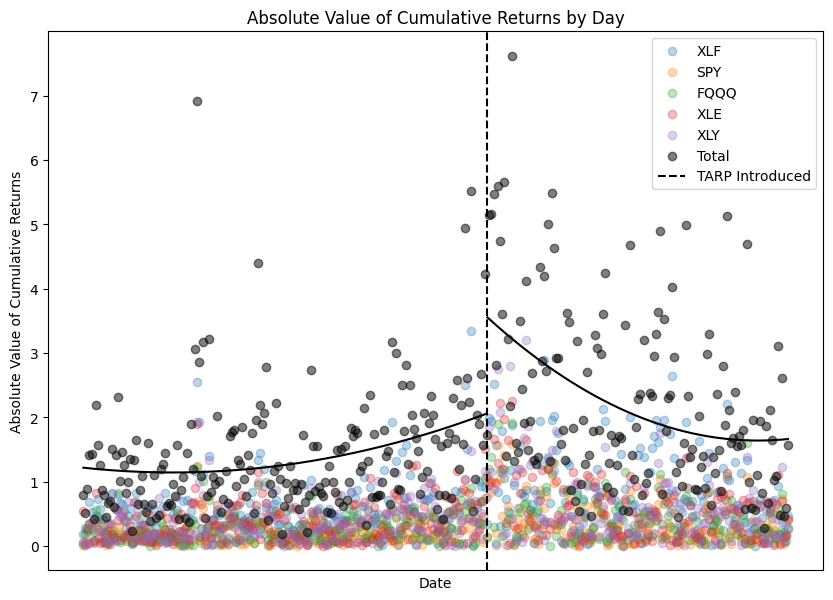

In [ ]:
from matplotlib import pyplot as plt

xlfOpen = train_df.filter(like='XLF_Open_').fillna(0)
xlfOpenSum = xlfOpen.index.map(lambda index: abs(np.array(xlfOpen.loc[[index]].values[0].tolist()[0:-1]).sum()))
train_df["XLF_Abs_Open_Sum"] = xlfOpenSum

spyOpen = train_df.filter(like='SPY_Open_').fillna(0)
spyOpenSum = spyOpen.index.map(lambda index: abs(np.array(spyOpen.loc[[index]].values[0].tolist()[0:-1]).sum()))
train_df["SPY_Abs_Open_Sum"] = spyOpenSum


qqqOpen = train_df.filter(like='QQQ_Open_').fillna(0)
qqqOpenSum = qqqOpen.index.map(lambda index: abs(np.array(qqqOpen.loc[[index]].values[0].tolist()[0:-1]).sum()))
train_df["QQQ_Abs_Open_Sum"] = qqqOpenSum


xleOpen = train_df.filter(like='XLE_Open_').fillna(0)
xleOpenSum = xleOpen.index.map(lambda index: abs(np.array(xleOpen.loc[[index]].values[0].tolist()[0:-1]).sum()))
train_df["XLE_Abs_Open_Sum"] = xleOpenSum


xlyOpen = train_df.filter(like='XLY_Open_').fillna(0)
xlyOpenSum = xlyOpen.index.map(lambda index: abs(np.array(xlyOpen.loc[[index]].values[0].tolist()[0:-1]).sum()))
train_df["XLY_Abs_Open_Sum"] = xlyOpenSum

openSums = train_df.filter(like='_Open_Sum').fillna(0)

def getMode(df, index):
  arr = np.array(df.loc[[index]].values.flatten())
  return (stats.mode(arr)[0])

def getMedian(df, index):
  arr = np.array(df.loc[[index]].values.flatten())
  return (np.median(arr))

def getMean(df, index):
  arr = np.array(df.loc[[index]].values.flatten())
  return (np.mean(arr))


sumAvg = openSums.index.map(lambda index: getMean(openSums, index))
sumTotal = openSums.index.map(lambda index: np.array(openSums.loc[[index]].values[0].tolist()[0:-1]).sum())

openSums["Open_Abs_Sum_Avg"] = sumAvg
openSums["Open_Abs_Sum_Total"] = sumTotal

f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

plt.scatter(openSums.index, openSums["XLF_Abs_Open_Sum"], alpha=0.3)
plt.scatter(openSums.index, openSums["SPY_Abs_Open_Sum"], alpha=0.3)
plt.scatter(openSums.index, openSums["QQQ_Abs_Open_Sum"], alpha=0.3)
plt.scatter(openSums.index, openSums["XLE_Abs_Open_Sum"], alpha=0.3)
plt.scatter(openSums.index, openSums["XLY_Abs_Open_Sum"], alpha=0.3)

plt.scatter(openSums.index, openSums["Open_Abs_Sum_Total"], color='black', alpha=0.5)


plt.axvline('20081003', c='black', linestyle="dashed")

x1 = indices[0:splt]
y1 = openSums["Open_Abs_Sum_Total"][0:splt]
fit1 = np.polyfit(x1, y1, 2)
fit_fn1 = np.poly1d(fit1)
plt.plot(x1, fit_fn1(x1), 'r', color="black")

x2 = indices[splt:]
y2 = openSums["Open_Abs_Sum_Total"][splt:]
fit2 = np.polyfit(x2, y2, 2)
fit_fn2 = np.poly1d(fit2)
plt.plot(x2, fit_fn2(x2), 'r', color="black")


plt.legend(["XLF", "SPY", "FQQQ", "XLE", "XLY", "Total", "TARP Introduced"])
plt.xlabel("Date")
plt.ylabel("plt.xlabel")
plt.ylabel("Absolute Value of Cumulative Returns")
plt.title("Absolute Value of Cumulative Returns by Day")

frame = plt.gca()
frame.axes.get_xaxis().set_ticks([])
plt.show()

<ipython-input-112-f152236340e8>:12: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.

<ipython-input-112-f152236340e8>:18: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.

<ipython-input-112-f152236340e8>:25: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.

<ipython-input-112-f152236340e8>:31: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.



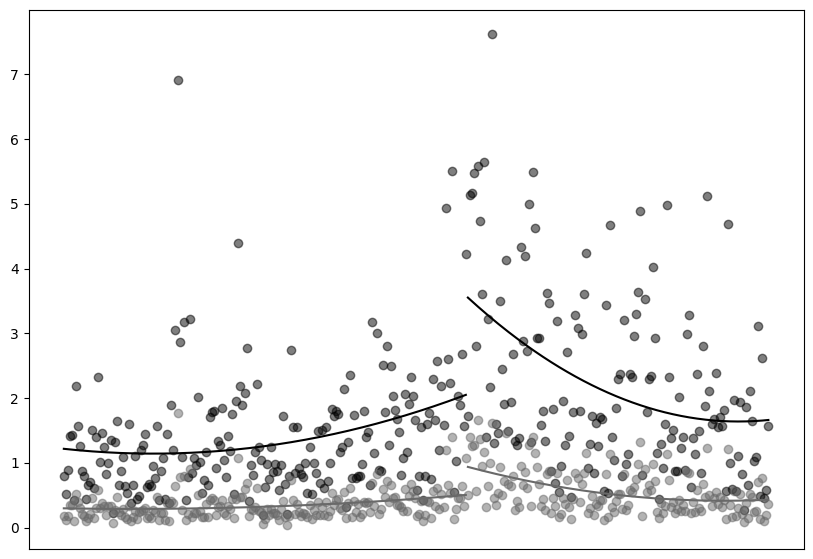

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)

plt.scatter(openSums.index, openSums["Open_Abs_Sum_Total"], color='black', alpha=0.5)
plt.scatter(openSums.index, openSums["Open_Abs_Sum_Avg"], color='dimgray', alpha=0.5)

x1 = indices[0:splt]
y1 = openSums["Open_Abs_Sum_Total"][0:splt]
fit1 = np.polyfit(x1, y1, 2)
fit_fn1 = np.poly1d(fit1)
plt.plot(x1, fit_fn1(x1), 'r', color="black")

x2 = indices[splt:]
y2 = openSums["Open_Abs_Sum_Total"][splt:]
fit2 = np.polyfit(x2, y2, 2)
fit_fn2 = np.poly1d(fit2)
plt.plot(x2, fit_fn2(x2), 'r', color="black")


x1 = indices[0:splt]
y1 = openSums["Open_Abs_Sum_Avg"][0:splt]
fit1 = np.polyfit(x1, y1, 2)
fit_fn1 = np.poly1d(fit1)
plt.plot(x1, fit_fn1(x1), 'r', color="dimgray")

x2 = indices[splt:]
y2 = openSums["Open_Abs_Sum_Avg"][splt:]
fit2 = np.polyfit(x2, y2, 2)
fit_fn2 = np.poly1d(fit2)
plt.plot(x2, fit_fn2(x2), 'r', color="dimgray")


frame = plt.gca()
frame.axes.get_xaxis().set_ticks([])
plt.show()

In [ ]:
def get_trade_Stats(df):
  #calculates statistics for each day for each stock separately
  tradeStats = pd.DataFrame()
  tickers = ["XLF", "SPY", "QQQ", "XLE", "XLY"]
  #adds row per key
  for key in tickers:
    tradeStats["Std:" + key] = df.filter(like= key + '_Open').std(axis=1)
    tradeStats["Mean:" + key] = df.filter(like= key + '_Open').mean(axis=1)
    tradeStats["Kurtosis:" + key] = df.filter(like= key + '_Open').kurtosis(axis=1)
    tradeStats["Skew:" + key] = df.filter(like= key + '_Open').skew(axis=1)
    tradeStats["volatility" + key] = tradeStats["Std:" + key] * np.sqrt(40)
    #sqrt is for 40 stock trades a day

# Split into 5 sections (8 trades each)
    section_size = 20
    for i in range(2):
        start = i * section_size
        end = start + section_size
        tradeStats[f"{key}_volatility_Section_{i+1}"] = df.filter(like= key + '_Open').iloc[:, start:end].std(axis=1) * np.sqrt(section_size)

  #calculates total stats, together as one
  tradeStats["Std"] = df.filter(like='_Open').std(axis=1)
  tradeStats["Mean"] = df.filter(like='_Open').mean(axis=1)
  tradeStats["Kurtosis"] = df.filter(like='_Open').kurtosis(axis=1)
  tradeStats["Skew"] = df.filter(like='_Open').skew(axis=1)
  tradeStats["volatility"] = tradeStats["Std"] * np.sqrt(40)

  return tradeStats

tradeStats = get_trade_Stats(train_df)
tradeStats

,Std:XLF,Mean:XLF,Kurtosis:XLF,Skew:XLF,volatilityXLF,XLF_volatility_Section_1,XLF_volatility_Section_2,Std:SPY,Mean:SPY,Kurtosis:SPY,...,Kurtosis:XLY,Skew:XLY,volatilityXLY,XLY_volatility_Section_1,XLY_volatility_Section_2,Std,Mean,Kurtosis,Skew,volatility
20071010,0.001984,-0.004902,0.770531,0.435272,0.012548,0.007286,0.007748,0.001372,-0.001056,-0.318870,...,1.414442,0.846595,0.008843,0.005628,0.006432,0.041179,0.005429,146.523920,11.545906,0.260442
20071011,0.004797,-0.007228,-0.228522,-0.827641,0.030340,0.010747,0.027515,0.005049,-0.001558,0.348281,...,0.040481,-1.172165,0.028398,0.005582,0.021509,0.024726,0.000379,86.854823,8.636456,0.156379
20071012,0.001798,0.005932,2.164274,-0.576402,0.011369,0.009152,0.005048,0.001141,0.002734,-0.069003,...,-0.677887,0.343579,0.007147,0.006176,0.003551,0.031616,0.008990,58.855735,7.619436,0.199960
20071015,0.005937,-0.017572,0.031325,0.886986,0.037546,0.021515,0.006421,0.003603,-0.008716,-0.196145,...,-0.462845,0.566144,0.021483,0.013815,0.004745,0.064619,0.003749,70.864130,7.975359,0.408684
20071017,0.007040,-0.013507,-0.844376,-0.089639,0.044526,0.014354,0.018475,0.004402,-0.007188,-1.319239,...,-1.411409,-0.051716,0.033773,0.010212,0.011649,0.056988,-0.000180,51.286222,6.936691,0.360422
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20090623,0.005357,0.004750,-0.075972,-0.680317,0.033883,0.025389,0.015023,0.002014,-0.001171,0.237072,...,-0.425928,0.420576,0.021515,0.018707,0.011187,0.024909,0.001712,60.316709,7.538931,0.157541
20090625,0.006742,0.010131,0.060555,-0.279742,0.042640,0.025766,0.016906,0.006916,0.018964,0.180905,...,2.505481,-1.533996,0.047192,0.036240,0.011507,0.123908,0.038210,57.244036,7.318405,0.783662
20090626,0.004445,0.001767,-0.185443,0.922460,0.028115,0.010163,0.018196,0.001803,-0.000898,0.486022,...,0.172482,-0.125274,0.012107,0.008500,0.007128,0.019772,0.003526,80.268745,8.405531,0.125050
20090629,0.004341,0.004674,2.039643,-1.654022,0.027454,0.022593,0.006060,0.002913,0.004443,2.875316,...,2.120610,-1.705562,0.029058,0.026970,0.008401,0.031482,0.009220,72.619322,8.017134,0.199112


In [ ]:
volDF = tradeStats.filter(regex="volatility...$")

def getMean(df, index):
  arr = np.array(df.loc[[index]].values.flatten())
  return (np.mean(arr))

volAvg = tradeStats.index.map(lambda index: getMean(volDF, index))
volAvg



Index([0.018561033118267383,  0.03884369593625282, 0.011209249007861348,
       0.025059230905580588,  0.03432750994736857, 0.014798225063876898,
       0.035532092532640745,  0.02499610724564824, 0.035688656629604916,
        0.03270387554218472,
       ...
       0.027409208110074877,  0.04816798416735913, 0.020697684838238264,
        0.02699411424871796,  0.03664973033700248, 0.023145481857251897,
        0.04378359844945014, 0.015714244800952855, 0.022276226165037535,
        0.02935633891255175],
      dtype='float64', length=348)

<ipython-input-40-1d0a5c6004cb>:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x1, fit_fn1(x1), 'r', color=linecolor)
<ipython-input-40-1d0a5c6004cb>:32: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "r" (-> color=(1.0, 0.0, 0.0, 1)). The keyword argument will take precedence.
  plt.plot(x2, fit_fn2(x2), 'r', color=linecolor)


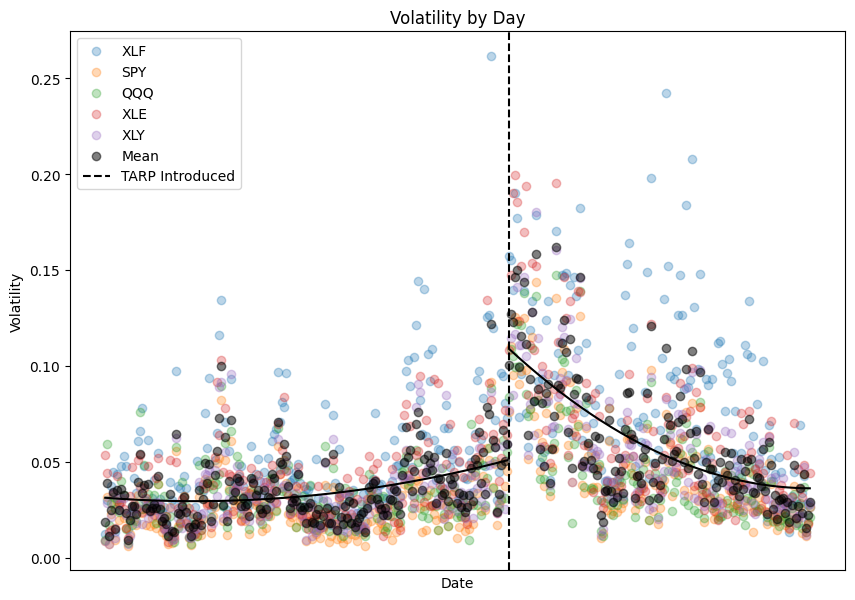

In [ ]:
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(7)



plt.scatter(indices, tradeStats["volatilityXLF"], alpha=0.3)
plt.scatter(indices, tradeStats["volatilitySPY"], alpha=0.3)
plt.scatter(indices, tradeStats["volatilityQQQ"], alpha=0.3)
plt.scatter(indices, tradeStats["volatilityXLE"], alpha=0.3)
plt.scatter(indices, tradeStats["volatilityXLY"], alpha=0.3)

plt.scatter(indices, volAvg, color="black", alpha=0.5)

plt.axvline(splt, c='black', linestyle="dashed")


x1 = indices[0:splt]
y1 = volAvg[0:splt]

linecolor = "black"

fit1 = np.polyfit(x1, y1, 2)
fit_fn1 = np.poly1d(fit1)
plt.plot(x1, fit_fn1(x1), 'r', color=linecolor)

x2 = indices[splt:]
y2 = volAvg[splt:]

fit2 = np.polyfit(x2, y2, 2)
fit_fn2 = np.poly1d(fit2)
plt.plot(x2, fit_fn2(x2), 'r', color=linecolor)

plt.legend(["XLF", "SPY", "QQQ", "XLE", "XLY", "Mean", "TARP Introduced"])
plt.xlabel("Date")
plt.ylabel("plt.xlabel")
plt.ylabel("Volatility")
plt.title("Volatility by Day")

frame = plt.gca()
frame.axes.get_xaxis().set_ticks([])
plt.show()